# ロジスティックス回帰

ロジスティックス回帰 = 大きさを比較できない質的データの分類

分類したいものに0,1をあてはめ、0~1の確率で考える

![alt text](Data/1.png)![alt text](Data/2.png)![alt text](Data/3.png)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 20)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [26]:
dataset = pd.read_csv('Data/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
reg = LogisticRegression(random_state=0)
reg.fit(X, y)

LogisticRegression(random_state=0)

In [28]:
reg.intercept_  # w0の値

array([-12.42645579])

In [29]:
reg.coef_  # w1の値

array([[2.33332955e-01, 3.58841017e-05]])

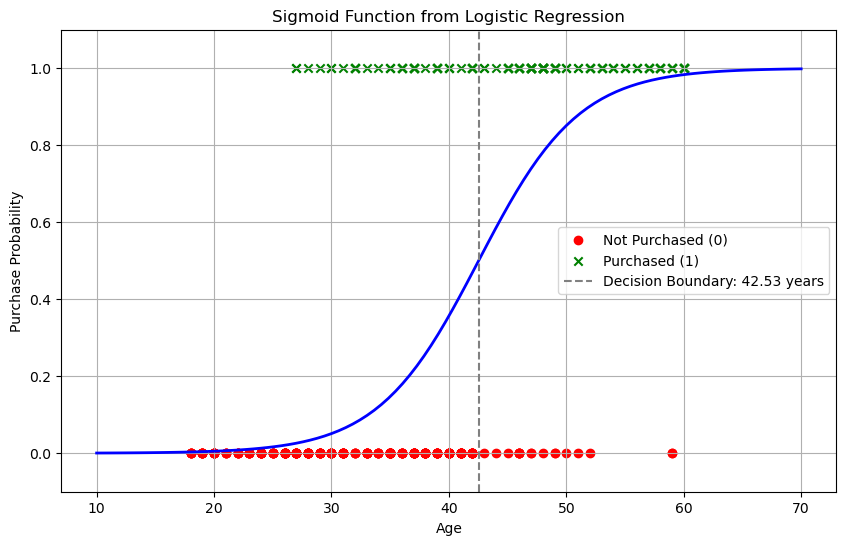

In [30]:
# Logistic Regressionによるシグモイド関数のプロット
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 年齢とシグモイド関数の関係をプロット
plt.figure(figsize=(10, 6))

# プロット用のデータ範囲を設定
X_age = np.linspace(10, 70, 100).reshape(-1, 1)
X_salary = np.full_like(X_age, X[:, 1].mean())
X_test = np.hstack([X_age, X_salary])

# モデルを使って予測確率を計算
proba = reg.predict_proba(X_test)[:, 1]

# シグモイド関数のプロット
plt.plot(X_age, proba, 'b-', linewidth=2)

# 実際のデータポイントをプロット
plt.scatter(X[y==0, 0], np.zeros_like(X[y==0, 0]), color='red', marker='o', label='Not Purchased (0)')
plt.scatter(X[y==1, 0], np.ones_like(X[y==1, 0]), color='green', marker='x', label='Purchased (1)')

# モデルの決定境界を表示
w0 = reg.intercept_[0]
w1 = reg.coef_[0, 0]
w2 = reg.coef_[0, 1]
decision_age = -w0 / w1 - (w2 / w1) * X_salary.mean()
plt.axvline(x=decision_age, color='gray', linestyle='--', label=f'Decision Boundary: {decision_age:.2f} years')

# グラフの装飾
plt.xlabel('Age')
plt.ylabel('Purchase Probability')
plt.title('Sigmoid Function from Logistic Regression')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()